# Classifying Heart Disease

In this project, we'll try to classify the presence of heart disease in an individual using a dataset collected by the Cleveland Clinic Foundation.

We'll be using the [Heart Disease Data Set](https://archive.ics.uci.edu/ml/datasets/Heart+Disease) from the UCI Machine Learning Repository. As mentioned, this dataset comes from the famous Cleveland Clinic Foundation, which recorded information on various patient characteristics, including age and chest pain, to try to classify the presence of heart disease in an individual. This a prime example of how machine learning can help solve problems that have a real impact on people's lives.

> Note: The dataset has already been partially cleaned. The original dataset has multiple classes.

In [147]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [148]:
heart = pd.read_csv('heart_disease.csv')
heart.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
0,1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,2,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,3,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,4,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


## Exploratory Data Analysis
With the dataset properly loaded, let's take some time to better understand the dataset at hand.

In [159]:
#find list column names, dtypes, and null value counts 
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   age         303 non-null    int64  
 2   sex         303 non-null    int64  
 3   cp          303 non-null    int64  
 4   trestbps    303 non-null    int64  
 5   chol        303 non-null    int64  
 6   fbs         303 non-null    int64  
 7   restecg     303 non-null    int64  
 8   thalach     303 non-null    int64  
 9   exang       303 non-null    int64  
 10  oldpeak     303 non-null    float64
 11  slope       303 non-null    int64  
 12  ca          303 non-null    object 
 13  thal        303 non-null    object 
 14  present     303 non-null    int64  
dtypes: float64(1), int64(12), object(2)
memory usage: 35.6+ KB


In [160]:
#df objects for features and target variable

features = heart.drop('present', axis=1)
target = heart['present']

In [161]:
#printing datatypes information of feature variables
print("\nFeature columns:")
print(features.dtypes)

print("\nData types summary:")
print(features.dtypes.value_counts())


Feature columns:
Unnamed: 0      int64
age             int64
sex             int64
cp              int64
trestbps        int64
chol            int64
fbs             int64
restecg         int64
thalach         int64
exang           int64
oldpeak       float64
slope           int64
ca             object
thal           object
dtype: object

Data types summary:
int64      11
object      2
float64     1
dtype: int64


In [162]:
#the proportion of labeled observations 
target.value_counts(normalize=True)

0    0.541254
1    0.458746
Name: present, dtype: float64

In [163]:
#displaying descriptive statistics of dataset
heart.describe()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,present
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,152.000000,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.458746
std,87.612784,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.499120
min,1.000000,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,76.500000,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,152.000000,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,227.500000,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,303.000000,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


Some notes on the dataset:
- The average age is around 54.4 years
- There are more men than women in the study
- 

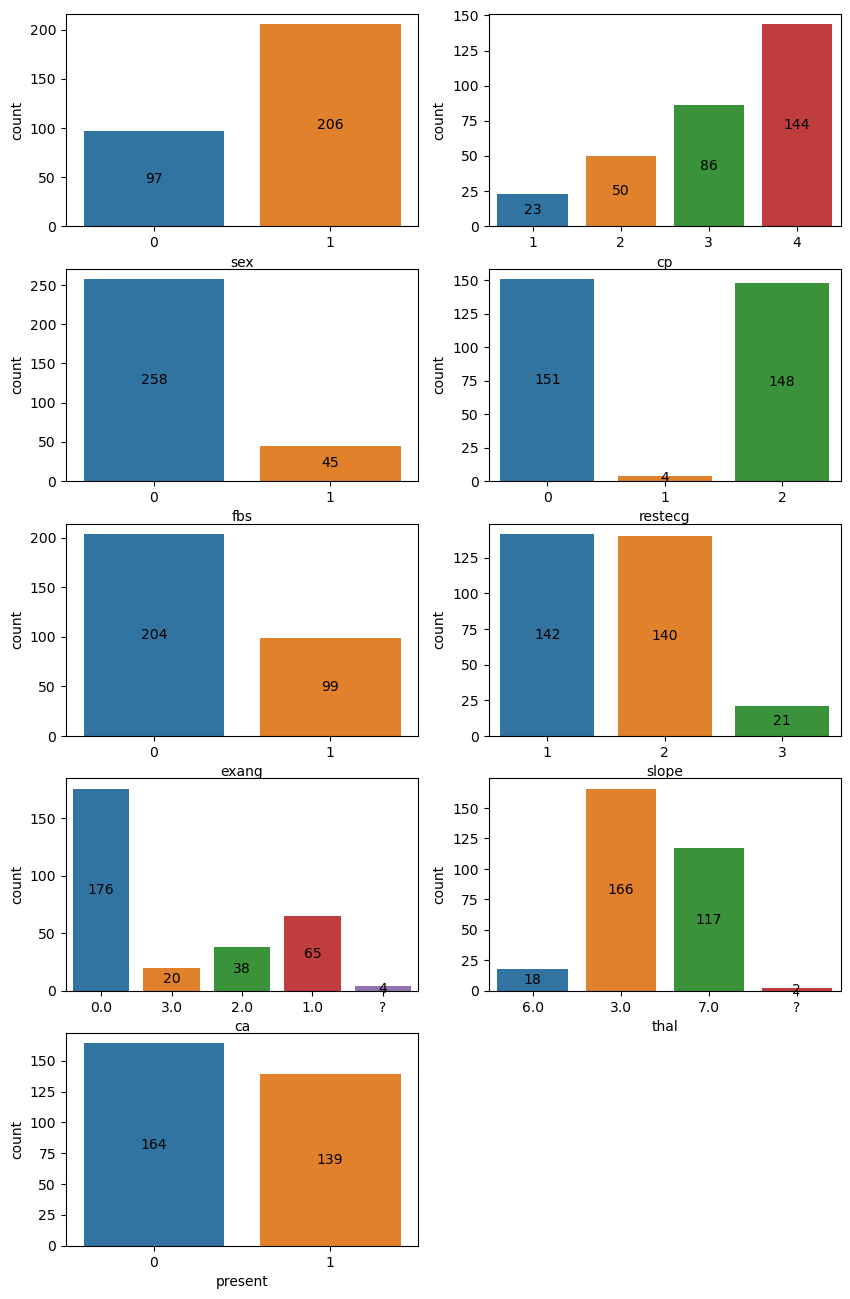

In [186]:
cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'present']

fig = plt.figure(figsize=(10,16))

for idx, col in enumerate(cat_cols):
    ax = plt.subplot(5, 2, idx+1)
    sns.countplot(x=heart[col], ax=ax)
    #add data label to each bar
    for container in ax.containers:
        ax.bar_label(container, label_type='center')
        #uncomment below if wishing to include percentages in bar labels
        #ax.bar_label(container, label_type='edge', labels=[f'{(count/total)*100:.0f}%' for count in container.datavalues])

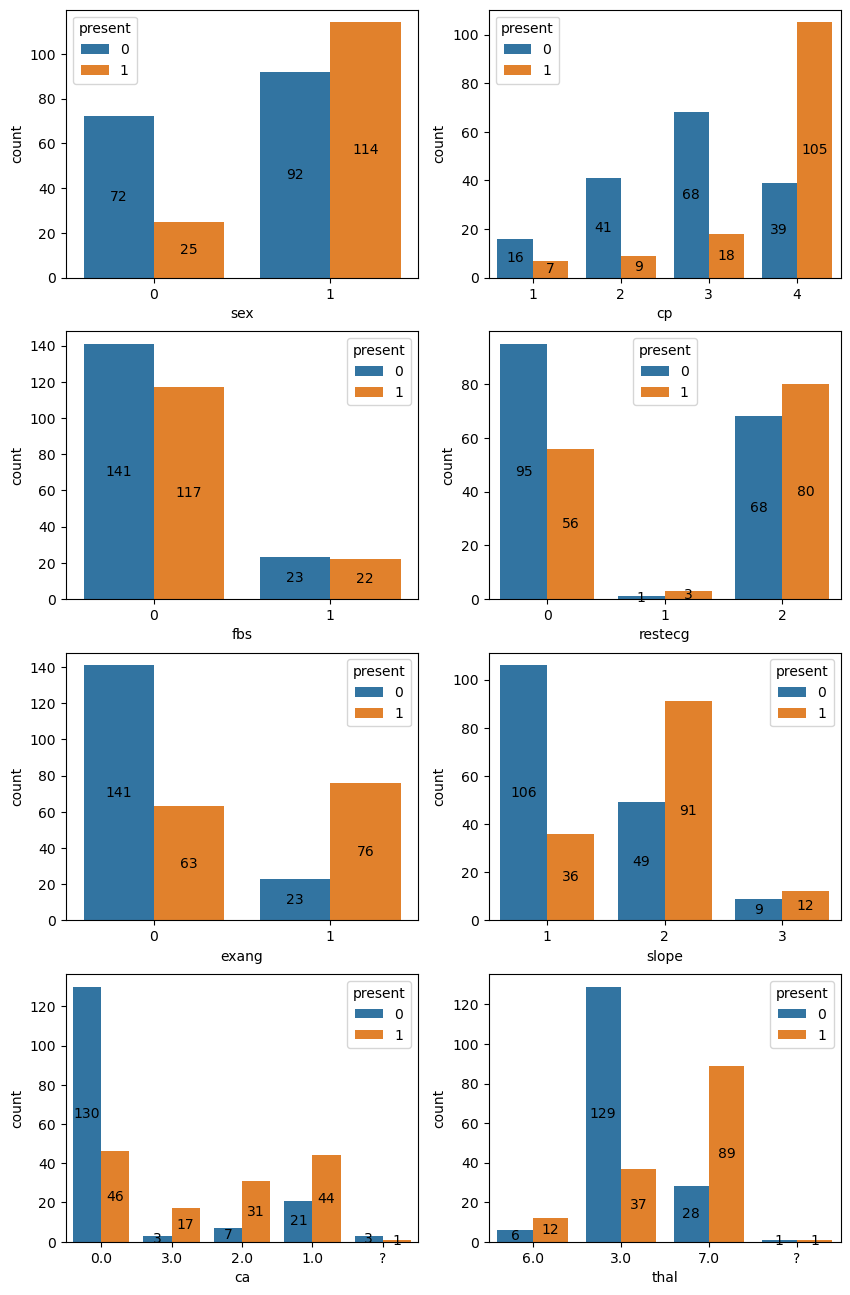

In [187]:
cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
fig = plt.figure(figsize=(10,16))

for idx, col in enumerate(cat_cols):
    ax = plt.subplot(4, 2, idx+1)
    sns.countplot(x=heart[col], hue=heart['present'], ax=ax) #group by heart disease
    #add data label to each bar
    for container in ax.containers:
        ax.bar_label(container, label_type='center')
        #uncomment below if wishing to include percentages in bar labels
        #ax.bar_label(container, label_type='edge', labels=[f'{(count/total)*100:.0f}%' for count in container.datavalues])

On the above charts

- On `sex`
    - Men take up a disportionally large proportion of all observations
    - While heart disease is only observed in about a quarter of all the women in the study, heart disease is observed in the *majority* of men
- `restecg` has an almost even split between 0 (normal) and 2 (showing probable/definite left ventricular hypertrophy)
    - Interestingly, there are about a handful of cases where `1` (having ST-T wave abnormality) is recorded
- `exang` (exercised induced angina)
   -  Theres a pretty clear indication that those who experience pain in their chest when exercising are more than three times more likely to have heart disease

In [184]:
grouped = heart.groupby('present')
grouped['ca'].count()

present
0    164
1    139
Name: ca, dtype: int64

In [178]:
heart[heart['restecg'] == 1]

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
231,232,55,0,4,180,327,0,1,117,1,3.4,2,0.0,3.0,1
257,258,76,0,3,140,197,0,1,116,0,1.1,2,0.0,3.0,0
282,283,55,0,4,128,205,0,1,130,1,2.0,2,1.0,7.0,1
285,286,58,1,4,114,318,0,1,140,0,4.4,3,3.0,6.0,1


## Initial Notes on Dataset

- There are 303 rows
- 15 columns
    - first column (`Unnamed: 0`) doesn't seem informative
    - Data types:
        - float: 1
        - int: 12
        - object: 2

## Cleaning the Dataset

In [150]:
heart[['Unnamed: 0', 'ca', 'thal']]

,Unnamed: 0,ca,thal
0,1,0.0,6.0
1,2,3.0,3.0
2,3,2.0,7.0
3,4,0.0,3.0
4,5,0.0,3.0
...,...,...,...
298,299,0.0,7.0
299,300,2.0,7.0
300,301,1.0,7.0
301,302,1.0,3.0


In [152]:
heart['ca'].value_counts()

0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: ca, dtype: int64

In [153]:
heart['thal'].value_counts()

3.0    166
7.0    117
6.0     18
?        2
Name: thal, dtype: int64

## Cleaning the Dataset Further

Even though the dataset was partially cleaned, there are some variables in the dataset that need to be addressed.

1. The first column doesn't seem to indicate much at all and might actually be an leftover artifact of the previous attempt to clean and archive the dataset. The column will be removed entirely.
2. The second issue we might face are columns `ca` and `thal`. As per the dataset's official documentation:
    - `ca`
        - entered as an 'integer' in original dataset; is instead dtype 'object' (string)
        - "number of major vessels (0-3) colored by flourosopy"
        - last observation seems to suggest that there are errant entries (`?`)
    - `thal`
        - considered 'categorical' in dataset;
            - 3 = normal
            - 6 = fixed defect
            - 7 = reversable defect

Let's clean up these columns.

In [134]:
#remove the unnecessary column
heart.drop(columns=['Unnamed: 0'], inplace=True)
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


#### Cleaning `ca` and `thal`
We know there is at least one errant entry (`?`) in the columns `ca` and `thal`. Let's see the counts for all of the values present in these columns. 

In [135]:
#getting value counts for 'ca' feature
print('Value counts of \'ca\':')
print(heart['ca'].value_counts(), '\n')

#getting value counts for 'thal' feature
print('Value counts of \'thal\':')
heart['thal'].value_counts()

Value counts of 'ca':
0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: ca, dtype: int64 

Value counts of 'thal':


3.0    166
7.0    117
6.0     18
?        2
Name: thal, dtype: int64

In [136]:
ca_qs = heart.loc[heart['ca'] == '?']
ca_qs

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
166,52,1,3,138,223,0,0,169,0,0.0,1,?,3.0,0
192,43,1,4,132,247,1,2,143,1,0.1,2,?,7.0,1
287,58,1,2,125,220,0,0,144,0,0.4,2,?,7.0,0
302,38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


In [137]:
thal_qs = heart.loc[heart['thal'] == '?']
thal_qs

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
87,53,0,3,128,216,0,2,115,0,0.0,1,0.0,?,0
266,52,1,4,128,204,1,0,156,1,1.0,2,0.0,?,1


Looks like our errant `?` entries appear four times on rows 166, 192,  287, and 302 in `ca` and twice in rows 87 and 264 in `thal`.

Seeing as these observations only account for ~2% of the dataset, it seems safe to omit them entirely.

In [138]:
#omiting observations where `ca` == `?`
heart.drop(ca_qs.index, inplace=True)

#omiting observations where `thal` == `?`
heart.drop(thal_qs.index, inplace=True)

#resetting index
heart.reset_index(drop=True, inplace=True)

In [139]:
#quick check of work
print('Values counts in \'ca\':')
print(heart['ca'].value_counts(),'\n')

print('Values in \'thal\':')
print(heart['thal'].value_counts(),'\n')

print('Rows in dataset: ',heart.shape[0])

Values counts in 'ca':
0.0    174
1.0     65
2.0     38
3.0     20
Name: ca, dtype: int64 

Values in 'thal':
3.0    164
7.0    115
6.0     18
Name: thal, dtype: int64 

Rows in dataset:  297


In [146]:
#changing data types of 'ca' and 'thal' into integers
heart[['ca', 'thal']] = heart[['ca', 'thal']].astype('float').astype('int')
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   sex       297 non-null    int64  
 2   cp        297 non-null    int64  
 3   trestbps  297 non-null    int64  
 4   chol      297 non-null    int64  
 5   fbs       297 non-null    int64  
 6   restecg   297 non-null    int64  
 7   thalach   297 non-null    int64  
 8   exang     297 non-null    int64  
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    int64  
 11  ca        297 non-null    int64  
 12  thal      297 non-null    int64  
 13  present   297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


### Tranforming Variables

In [122]:
heart = pd.get_dummies(heart, columns=['ca', 'thal'], drop_first=True)
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,present,ca_1.0,ca_2.0,ca_3.0,thal_6.0,thal_7.0
0,63,1,1,145,233,1,2,150,0,2.3,3,0,0,0,0,1,0
1,67,1,4,160,286,0,2,108,1,1.5,2,1,0,0,1,0,0
2,67,1,4,120,229,0,2,129,1,2.6,2,1,0,1,0,0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,0,0,0,0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,57,0,4,140,241,0,0,123,1,0.2,2,1,0,0,0,0,1
293,45,1,1,110,264,0,0,132,0,1.2,2,1,0,0,0,0,1
294,68,1,4,144,193,1,0,141,0,3.4,2,1,0,1,0,0,1
295,57,1,4,130,131,0,0,115,1,1.2,2,1,1,0,0,0,1


## Exploratory Data Analysis

In [123]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,present,ca_1.0,ca_2.0,ca_3.0,thal_6.0,thal_7.0
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.461279,0.218855,0.127946,0.067340,0.060606,0.387205
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.499340,0.414168,0.334594,0.251033,0.239009,0.487933
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [124]:
heart['present'].value_counts(normalize=True)

0    0.538721
1    0.461279
Name: present, dtype: float64

There are more cases where heart diseases isn't observed in an individual (`present` = `0`) than there are those that were confirmed to have had heart disease (`present` = `1`).

In [125]:
# Checking potential predictors
heart.groupby("present").agg(
    {
        "age": "mean",
        "sex": "mean",
        "cp": "mean",
        "trestbps": "mean",
        "chol": "mean",
        "fbs": "mean",
        "restecg": "mean",
        "thalach": "mean",
        "exang": "mean",
        "oldpeak": "mean",
        "slope": "mean",
        
    }
)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
present,,,,,,,,,,,
0,52.643750,0.556250,2.793750,129.175000,243.493750,0.143750,0.843750,158.581250,0.143750,0.598750,1.412500
1,56.759124,0.817518,3.583942,134.635036,251.854015,0.145985,1.175182,139.109489,0.540146,1.589051,1.824818


In [45]:
heart.groupby("present").agg(pd.Series.mode)[['ca', 'thal']]


,ca,thal
present,,
0,0.0,3.0
1,0.0,7.0


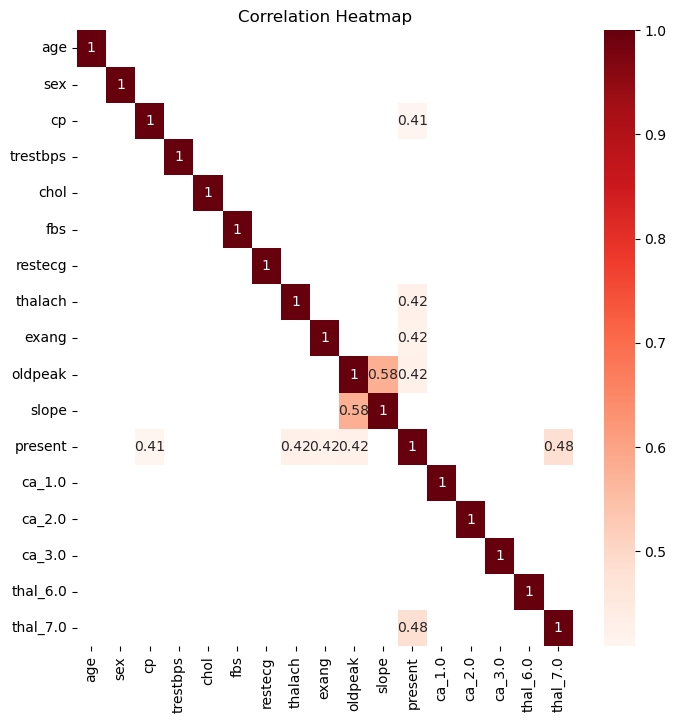

In [129]:
# Plot a heatmap of correlation
corr = heart.corr().abs()
plt.figure(figsize=(8, 8))
sns.heatmap(corr[corr > 0.4], annot=True, cmap='Reds')
plt.title('Correlation Heatmap')
# plt.tight_layout()
plt.show()